<b>
Name : Anish Rajesh Adnani
<br>
USC ID : 4092610491
<br>
USC Email ID : adnani@usc.edu
<br>
Github Username : midnightbot
<br>
    </b>

<b> 1. Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1. </b>

In [1]:
## Basic imports

In [2]:
from scipy.io import arff ## used for reading arff data
import pandas as pd  ## used for data analysis
import seaborn as sns  ## used for data visualization
import matplotlib.pyplot as plt  ## used for plotting
from sklearn.neighbors import KNeighborsClassifier  ##used for KNN
import numpy as np  ## np array used for plotting plots
from sklearn.metrics import confusion_matrix  ## used for confusion matrix
from sklearn.metrics import classification_report  ## for Classification Report
import math  ## for floor division

<b> (a) Download the Vertebral Column Data Set from:
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column <b>

In [3]:
data_location = "../data/vertebral_column_data/column_2C_weka.arff"

In [4]:
data = arff.loadarff(data_location)
df = pd.DataFrame(data[0])
df.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [5]:
for index,row in df.iterrows():
    if row['class'] == b'Abnormal':
        df.at[index, 'class'] = 1
        
    else:
        df.at[index, 'class'] = 0

In [6]:
df.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


<b>Data available at data_location</b>

<b> (b) Pre-Processing and Exploratory data analysis <b>

<b> (i) Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

In [7]:
## finding out all variables
arr = list(df.columns)
print(arr)

## class is the dependent variable
indp_vars =  arr[:-1]
print(indp_vars)

['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']


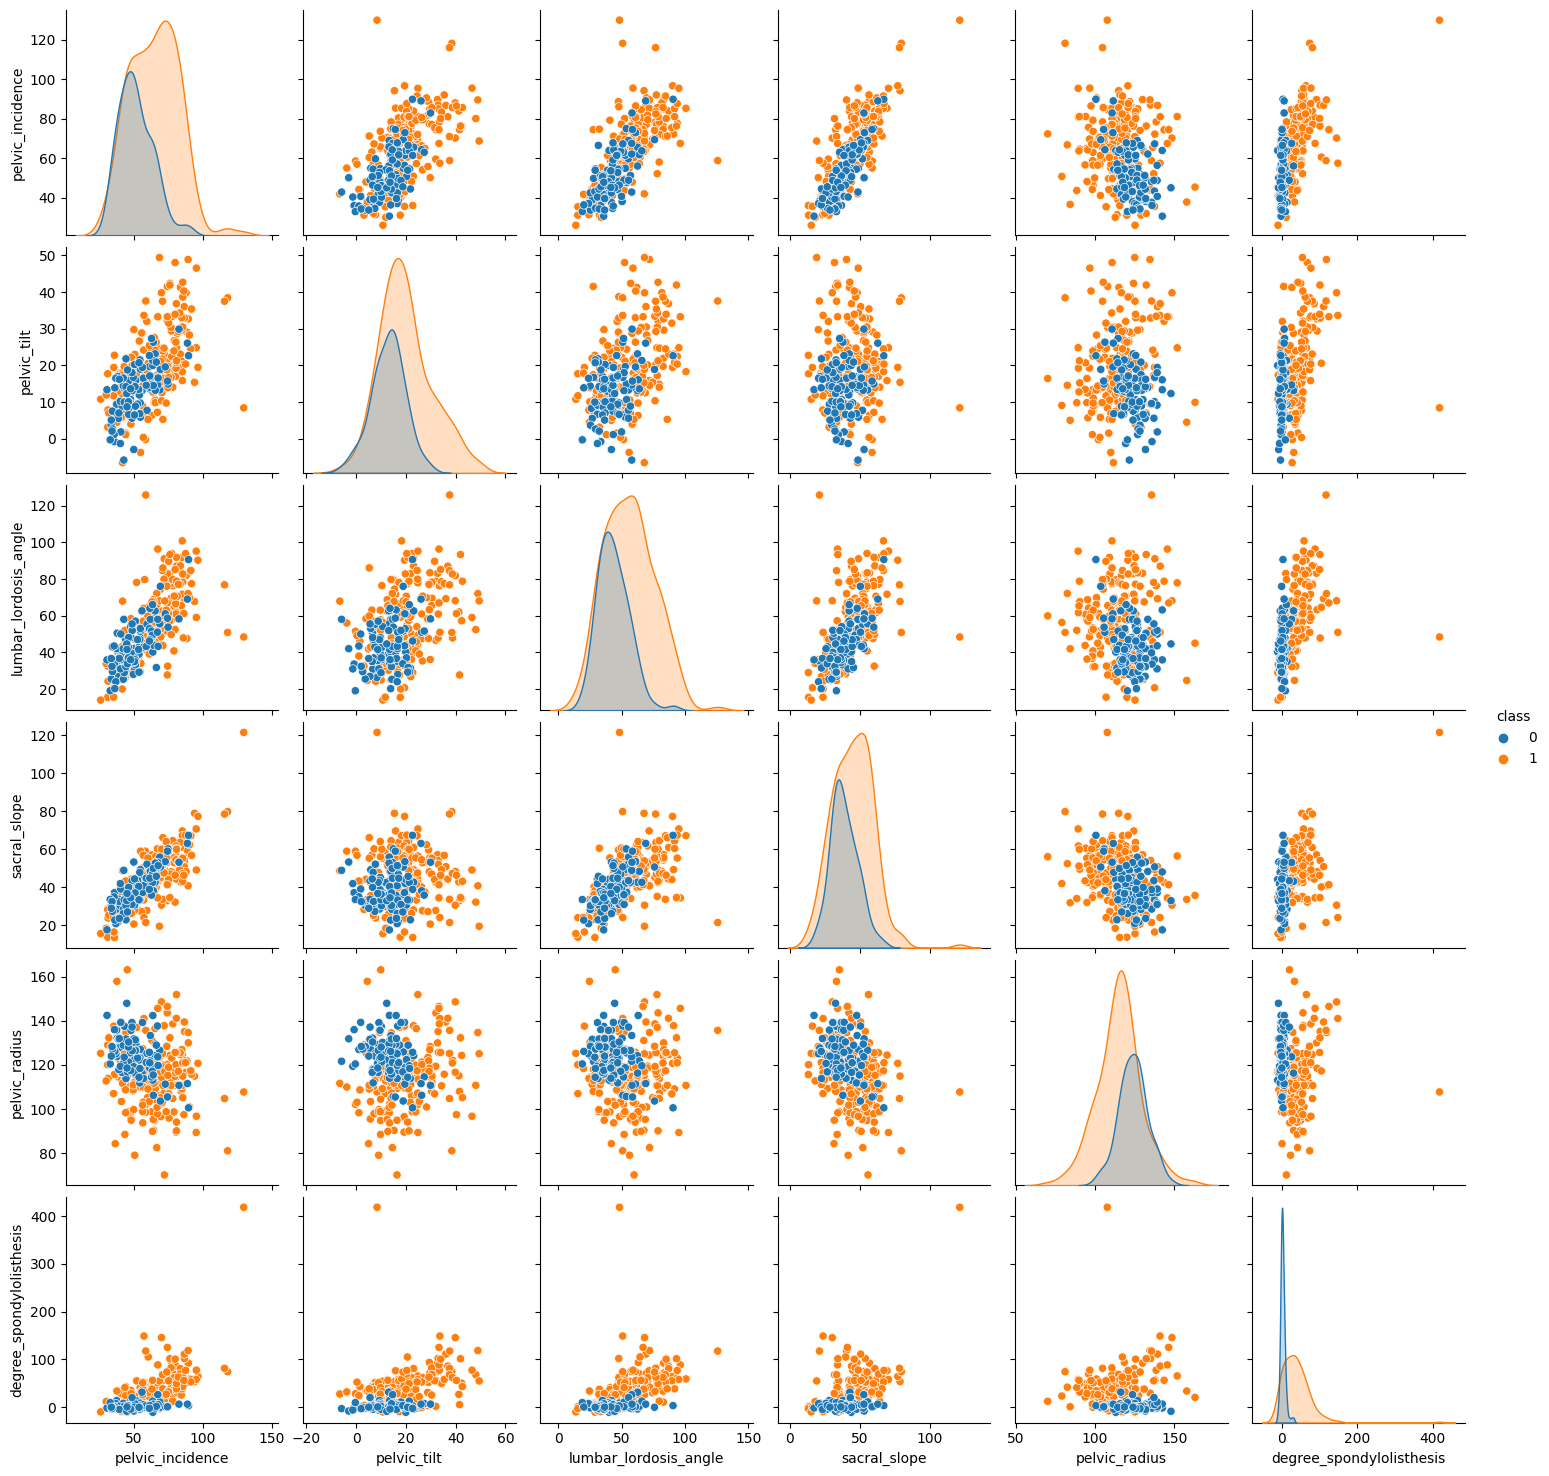

In [8]:
sns.pairplot(df, hue='class', vars = indp_vars)
plt.show()

<b> (ii) Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129) <b>

In [9]:
def box_plot_maker(indp_variable):
    """
    Plots the BoxPlot
    Parameters : indp_variable (Variable to be plotted on the y_axis)
    Return : -
    """
    sns.boxplot(x='class', y= indp_variable, data = df, hue='class')
    plt.show()

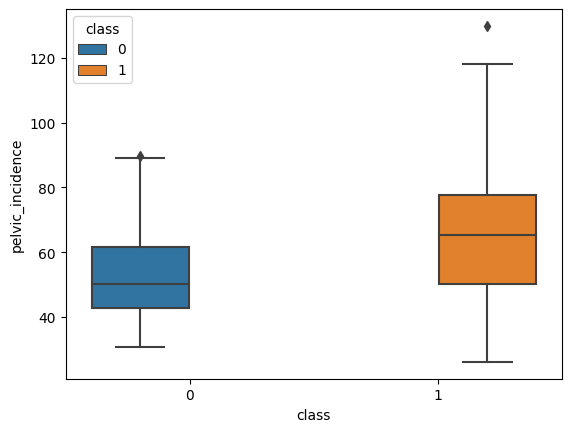

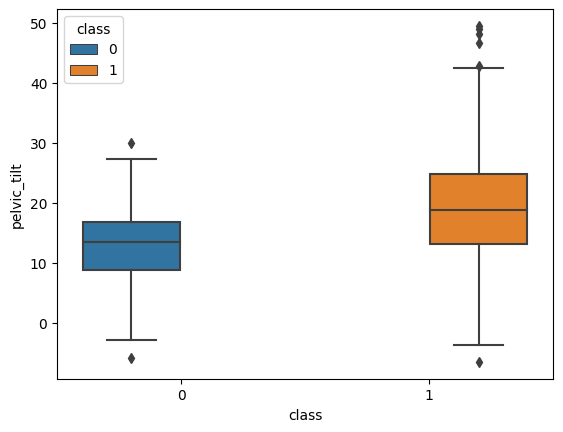

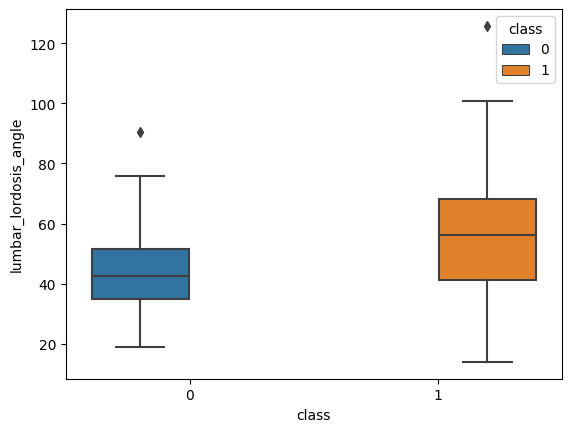

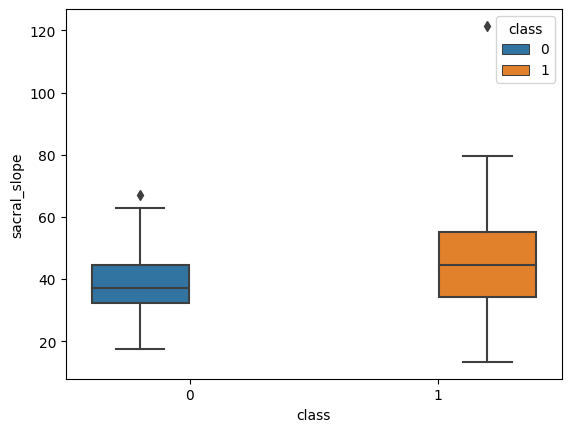

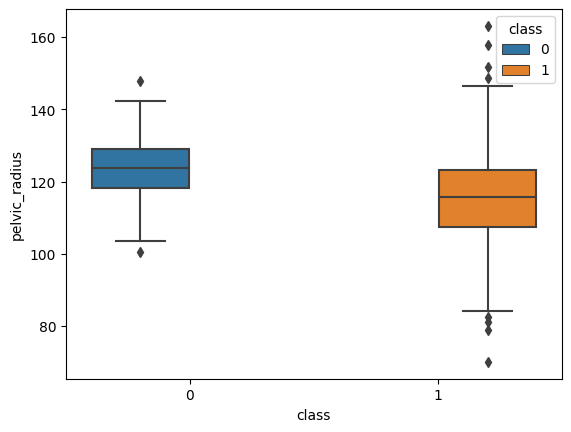

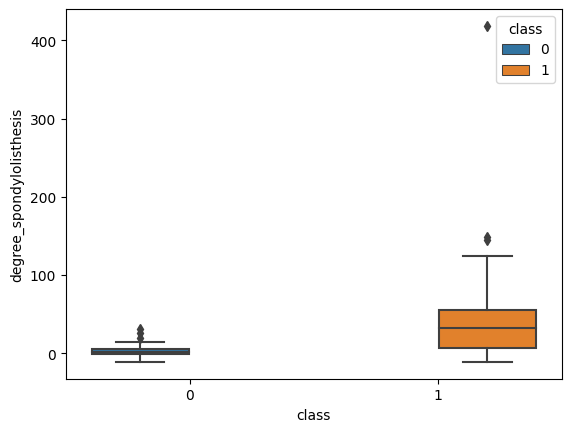

In [10]:
for var in indp_vars:
    box_plot_maker(var)

<b> (iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set </b>

In [11]:
class0_df = df[df['class'] == 0]
class1_df = df[df['class'] == 1]

In [12]:
size0 = len(class0_df)
size1 = len(class1_df)
print("Class 0 size ==> ", size0)
print("Class 1 size ==> ", size1)
train_data = pd.concat([class0_df.head(70), class1_df.head(140)])
test_data = pd.concat([class0_df.tail(size0-70), class1_df.tail(size1-140)])

train_size = len(train_data)
test_size = len(test_data)

print("Train Data Size ==> ", train_size)
print("Test Data Size ==> ", test_size)

Class 0 size ==>  100
Class 1 size ==>  210
Train Data Size ==>  210
Test Data Size ==>  100


<b> (c) Classification using KNN on Vertebral Column Data Set</b>

<b> (i) Write code for k-nearest neighbors with Euclidean metric (or use a software
package)</b>

In [13]:
print(indp_vars)
train_x = train_data[indp_vars]
train_y = train_data['class']
train_y = train_y.astype('int')
test_x = test_data[indp_vars]
test_y = test_data['class']
test_y = test_y.astype('int')

['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']


In [14]:
def knn_trainer(k, train_x, train_y, test_x, test_y):
    ## if p = 2 distance used is euclidean
    knn = KNeighborsClassifier(n_neighbors= k, p=2)
    knn.fit(train_x, train_y)
    
    ## accuracy and error
    train_acc = knn.score(train_x, train_y)
    test_acc = knn.score(test_x, test_y)
    
    train_error = 1 - train_acc
    test_error = 1 - test_acc
    
    return [k, train_acc, test_acc, train_error, test_error]

<b> (ii) Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k*</b>

In [15]:
result = []

for x in range(208,0,-3):
    ans = knn_trainer(x, train_x, train_y, test_x, test_y)
    result.append(ans)
    
#print(result)

## finding the best k
best_acc = 0
best_k = -1

for it in result:
    if it[2] > best_acc:
        best_acc = it[2]
        best_k = it[0]
        
print(" Best K* ==>", best_k)

 Best K* ==> 4


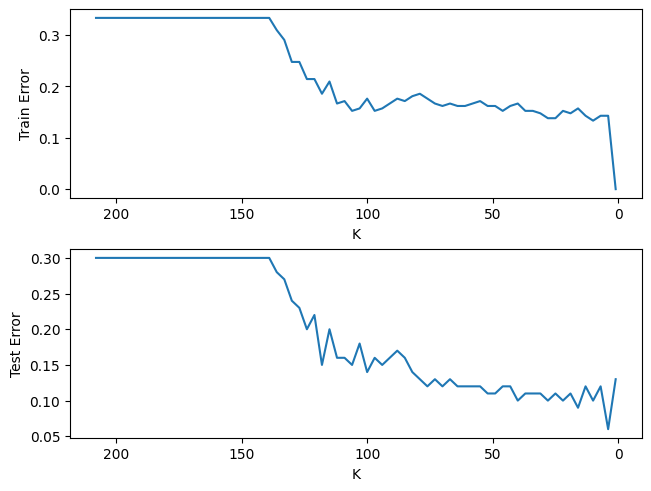

In [16]:
## Train Error vs K
graph, (plot1, plot2) = plt.subplots(2,1, constrained_layout = True)
plot1.plot(np.array([x for x in range(208,0,-3)]), np.array([x[3] for x in result]))
plot1.set_xlabel("K")
plot1.set_ylabel("Train Error")
plot1.invert_xaxis()
## Test Error vs K
plot2.plot(np.array([x for x in range(208,0,-3)]), np.array([x[4] for x in result]))
plot2.invert_xaxis()
plot2.set_xlabel("K")
plot2.set_ylabel("Test Error")
plt.show()

In [17]:
## Confusion Matrix
best_ans = []
knn = KNeighborsClassifier(n_neighbors= best_k, p=2)
knn.fit(train_x, train_y)

prediction_y = knn.predict(test_x)

conf_mat = confusion_matrix(test_y, prediction_y)
print(conf_mat)

TN, FP, FN, TP = conf_mat.ravel()
## True Positive Rate
TPR = (TP)/(TP + FN)
print("True Positive Rate ==> ", TPR)
## True Negative Rate
FPR = (TN)/(FP+TN)
print("False Positive Rate ==> ", FPR)
## Precision and F1-Score
print(classification_report(test_y, prediction_y))

[[25  5]
 [ 1 69]]
True Positive Rate ==>  0.9857142857142858
False Positive Rate ==>  0.8333333333333334
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



<b> (iii) Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the
best test error rate
,
3
which
is obtained by some value of
k
, against the size of training set, when the
size of training set is
N
∈ {
10
,
20
,
30
, . . . ,
210
}
.
4
Note: for each
N
, select
your training set by choosing the first
b
N/
3
c
rows of Class 0 and the first
N
− b
N/
3
c
rows of Class 1 in the training set you created in 1(b)iii. Also, for
each
N
, select the optimal
k
from a set starting from
k
= 1, increasing by 5.
For example, if
N
= 200, the optimal
k
is selected from
{
1
,
6
,
11
, . . . ,
196
}
.
This plot is called a
Learning Curve

    
</b>

In [18]:
def knn_trainer(training_x, training_y, testing_x, testing_y, n):
    """
    Trains KNN and finds the best K and best training error for this training set
    Parameters : training_x (Training Samples)
                 training_y (Training Sample Output)
                 testing_x (Testing Samples)
                 testing_y (Testing Sample Output)
                 n (Number of Training Samples)
    Result : n (Number of Training Samples)
             bst_k (Best K for this Training Set)
             best_test_err (Best Test Error, i.e Test error using k = bst_k)
    """
    bst_k = float('inf')
    best_test_err = float('inf')
    for k_vals in range(1, min(n, 200), +5):
        knn = KNeighborsClassifier(n_neighbors= k_vals, p=2)
        knn.fit(training_x, training_y)
        
        test_acc = knn.score(testing_x, testing_y)
        test_err = 1 - test_acc
        
        if test_err < best_test_err:
            best_test_err = test_err
            bst_k = k_vals
            
    return [n, bst_k, best_test_err]
        

In [19]:
answers = []
for x in range(10, 220, +10):
    class0_size = math.floor(x/3)
    class1_size = x - class0_size
    new_train = pd.concat([class0_df.head(class0_size), class1_df.head(class1_size)])
    new_train_x = new_train[indp_vars]
    new_train_y = new_train['class']
    new_train_y = new_train_y.astype('int')
    this_ans = knn_trainer(new_train_x, new_train_y, test_x, test_y, x)
    answers.append(this_ans)
print(answers)

[[10, 1, 0.25], [20, 6, 0.19999999999999996], [30, 1, 0.21999999999999997], [40, 11, 0.25], [50, 26, 0.30000000000000004], [60, 21, 0.29000000000000004], [70, 26, 0.29000000000000004], [80, 31, 0.29000000000000004], [90, 41, 0.29000000000000004], [100, 6, 0.26], [110, 6, 0.21999999999999997], [120, 16, 0.17000000000000004], [130, 16, 0.16000000000000003], [140, 16, 0.15000000000000002], [150, 16, 0.13], [160, 6, 0.13], [170, 6, 0.13], [180, 6, 0.09999999999999998], [190, 6, 0.08999999999999997], [200, 6, 0.08999999999999997], [210, 6, 0.07999999999999996]]


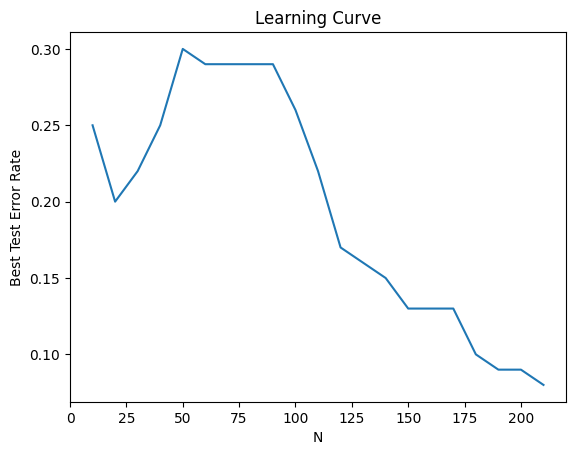

In [20]:
plt.plot([x[0] for x in answers], [x[2] for x in answers])
plt.xlabel("N")
plt.ylabel("Best Test Error Rate")
plt.title("Learning Curve")
plt.show()

<b> (d) Replace the Euclidean metric with the following metrics
5
and test them. Sum-
marize the test errors (i.e., when
k
=
k
∗
) in a table. Use all of your training data
and select the best
k
when
{
1
,
6
,
11
, . . . ,
196
} </b>

<b> (i) Minkowski Distance: </b>

<b> (A) which becomes Manhattan Distance with p = 1</b>

In [21]:
def knn_trainer_2(train_x, train_y, test_x, test_y):
    ## if p = 1 distance used is Manhattan
    
    lowest_test_error = float('inf')
    final_selected_k = -1
    for this_k in range(1, 200, +5):
        knn = KNeighborsClassifier(n_neighbors= this_k, p=1)
        knn.fit(train_x, train_y)

        
        test_acc = knn.score(test_x, test_y)
        test_error = 1 - test_acc
    
        
        if test_error < lowest_test_error:
            lowest_test_error = test_error
            final_selected_k = this_k
            
    return final_selected_k, lowest_test_error

In [22]:
final_k, final_error = knn_trainer_2(train_x, train_y, test_x, test_y)
print("Best K is ==> ", final_k)
print("Best Test Error ==> ", final_error)

Best K is ==>  1
Best Test Error ==>  0.10999999999999999


<b> (B) with log
10
(
p
)
∈ {
0
.
1
,
0
.
2
,
0
.
3
, . . . ,
1
}
. In this case, use the
k
∗
you found
for the Manhattan distance in 1(d)iA. What is the best log
10
(
p
)?</b>

In [23]:
def knn_trainer_3(vals,train_x, train_y, test_x, test_y):
    ## if p = 1 distance used is Manhattan
    
    lowest_test_error = float('inf')
    final_selected_k = -1
    
    knn = KNeighborsClassifier(n_neighbors= final_k, p=pow(10,vals))
    knn.fit(train_x, train_y)

        
    test_acc = knn.score(test_x, test_y)
    test_error = 1 - test_acc
    
    return [vals,test_error]

In [24]:
ans = []
for x in range(1,11,1):
    ans.append(knn_trainer_3(x/10,train_x, train_y, test_x, test_y))
print(ans)

[[0.1, 0.13], [0.2, 0.13], [0.3, 0.13], [0.4, 0.14], [0.5, 0.14], [0.6, 0.12], [0.7, 0.10999999999999999], [0.8, 0.10999999999999999], [0.9, 0.10999999999999999], [1.0, 0.10999999999999999]]


In [25]:
best_p = -1
bst_err = 1
for x,y in ans:
    if y < bst_err:
        bst_err = y
        best_p = x
    
print("Best log10p ==>", best_p)

Best log10p ==> 0.7


<b> (C) which becomes Chebyshev Distance with p → ∞</b>

In [26]:
def knn_trainer_4(train_x, train_y, test_x, test_y):
    ## if p = 1 distance used is Manhattan
    
    lowest_test_error = float('inf')
    final_selected_k = -1
    for this_k in range(1, 200, +5):
        knn = KNeighborsClassifier(n_neighbors= this_k, p=float('inf'))
        knn.fit(train_x, train_y)

        
        test_acc = knn.score(test_x, test_y)
        test_error = 1 - test_acc
    
        
        if test_error < lowest_test_error:
            lowest_test_error = test_error
            final_selected_k = this_k
            
    return final_selected_k, lowest_test_error

In [27]:
ans2 = knn_trainer_4(train_x, train_y, test_x, test_y)
print("Best K for p->∞  ==> ", ans2[0])
print("Least Test Error for p->∞  ==> ", ans2[1])

Best K for p->∞  ==>  16
Least Test Error for p->∞  ==>  0.07999999999999996


<b> (ii) Mahalanobis Distance </b>

In [28]:
def knn_trainer_5(train_x, train_y, test_x, test_y):
    ## if p = 1 distance used is Manhattan
    
    lowest_test_error = float('inf')
    final_selected_k = -1
    S = train_x.cov()
    SI = np.linalg.pinv(S)
    for this_k in range(1, 200, +5):
        knn = KNeighborsClassifier(n_neighbors= this_k, metric = 'mahalanobis', metric_params={'VI':SI})
        knn.fit(train_x, train_y)

        
        test_acc = knn.score(test_x, test_y)
        test_error = 1 - test_acc
    
        
        if test_error < lowest_test_error:
            lowest_test_error = test_error
            final_selected_k = this_k
            
    return final_selected_k, lowest_test_error

In [29]:
ans = knn_trainer_5(train_x, train_y, test_x, test_y)
print("Best k ==> ", ans[0])
print("Least Test Error ==> ", ans[1])

Best k ==>  1
Least Test Error ==>  0.15000000000000002


In [30]:
ans_data = [['Manhattan', 1, 0.10999999999999999], ['Chebyshev', 16, 0.07999999999999996], ['Mahalanobis', 1, 0.15000000000000002]]
ans_df = pd.DataFrame(ans_data, columns = ['distance_name', 'best_k', 'test_error'])
ans_df

,distance_name,best_k,test_error
0,Manhattan,1,0.11
1,Chebyshev,16,0.08
2,Mahalanobis,1,0.15


<b> (e) The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is
inversely proportional
to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when
k
∈ {
1
,
6
,
11
,
16
, . . . ,
196
}</b>

In [31]:
def knn_trainer_6(train_x, train_y, test_x, test_y, dist_type):
    
    lowest_test_error = float('inf')
    final_selected_k = -1
    for this_k in range(1, 200, +5):
        knn = KNeighborsClassifier(n_neighbors= this_k, p=dist_type, weights='distance')
        knn.fit(train_x, train_y)

        
        test_acc = knn.score(test_x, test_y)
        test_error = 1 - test_acc
    
        
        if test_error < lowest_test_error:
            lowest_test_error = test_error
            final_selected_k = this_k
            
    return [dist_type,final_selected_k, lowest_test_error]

In [32]:
weighted_knn = []
dist_names = {1:'Manhattan', 2:'Euclidean', float('inf'):'Chebyshev'}
for x in [1,2,float('inf')]:
    this_ans = knn_trainer_6(train_x, train_y, test_x, test_y, x)
    weighted_knn.append(this_ans+[dist_names[x]])
    
print(weighted_knn)

[[1, 26, 0.09999999999999998, 'Manhattan'], [2, 6, 0.09999999999999998, 'Euclidean'], [inf, 16, 0.10999999999999999, 'Chebyshev']]


In [33]:
final_ans = [[x[3], x[1], x[2]] for x in weighted_knn]
final_df = pd.DataFrame(final_ans, columns = ['distance_name', 'best_k', 'test_error'])
final_df

,distance_name,best_k,test_error
0,Manhattan,26,0.10
1,Euclidean,6,0.10
2,Chebyshev,16,0.11


<b> (f) What is the lowest training error rate you achieved in this homework?</b>

<b>Lowest Training error => 0
<br>
for k => 1
<br>
As nearest neighbour for every point will be the point itself and hence it will lead to extreme hammering of the learning curve (overfitting)</b>